# **Altair examples**
---

<a href="https://midoritoyota.netlify.app/" target="_blank"><img align="left" src="portfolio.png" title="See my portfolio!"/></a><img align="left" src="espaco.png"/>

<a href="mailto:midori.toyota@gmail.com" target="_blank"><img align="left" src="gmail.png" title="Contact me!"/></a><img align="left" src="espaco.png"/>

<a href="https://www.linkedin.com/in/midoritoyota/" target="_blank"> <img align="left" src="linkedin.png" title="Connect with me on linkedin!" /></a><img align="left" src="espaco.png"/>

<a href="https://github.com/MidoriToyota" target="_blank"> <img align="left" src="github.png" title="Follow me on github!"/></a>

<br/><br/>

In order to improve the graphs of <a href="https://mytwitterdata.herokuapp.com/" target="_blank">My Twitter Data</a> app, I am going to investigate the Altair library. I will do this by reproducing the examples of it's main source of information, so exerything found bellow is better explained in the following website:

https://altair-viz.github.io/gallery/index.html

## **Libraries**

In [44]:
import altair as alt
import pandas as pd
import numpy as np

## **Main concepts**
---

In [45]:
# Example data
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})

In [46]:
# Fundamental object
chart = alt.Chart(data)

In [14]:
# Marks = the type of the graph
alt.Chart(data).mark_point()

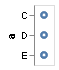

In [20]:
# Enconding = the structure of the graph
alt.Chart(data).mark_point().encode(
    y='a',
)

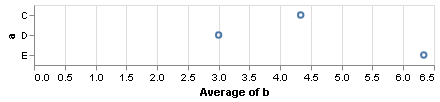

In [19]:
# Aggregation
alt.Chart(data).mark_point().encode(
    y='a',
    x='average(b)'
)

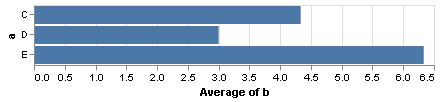

In [18]:
# Change marks (type of graph)
alt.Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)

In [21]:
# Examining the Json output
chart = alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.4.0.json",
  "config": {
    "mark": {
      "tooltip": null
    },
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-347f1284ea3247c0f55cb966abbdd2d8"
  },
  "datasets": {
    "data-347f1284ea3247c0f55cb966abbdd2d8": [
      {
        "a": "C",
        "b": 2
      },
      {
        "a": "C",
        "b": 7
      },
      {
        "a": "C",
        "b": 4
      },
      {
        "a": "D",
        "b": 1
      },
      {
        "a": "D",
        "b": 2
      },
      {
        "a": "D",
        "b": 6
      },
      {
        "a": "E",
        "b": 8
      },
      {
        "a": "E",
        "b": 4
      },
      {
        "a": "E",
        "b": 7
      }
    ]
  },
  "encoding": {
    "x": {
      "field": "a",
      "type": "nominal"
    },
    "y": {
      "aggregate": "average",
      "field": "b",
      "type": "quantitative"
    }
  },
  "mark": "bar"
}


In [25]:
# Short syntax
y = alt.Y('average(b):Q')
print(y.to_json())

{
  "aggregate": "average",
  "field": "b",
  "type": "quantitative"
}


In [24]:
# Full syntax 
y = alt.Y(field='b', type='quantitative', aggregate='average')
print(y.to_json())

{
  "aggregate": "average",
  "field": "b",
  "type": "quantitative"
}


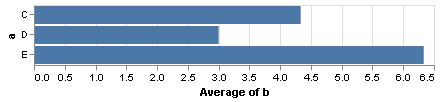

In [26]:
alt.Chart(data).mark_bar().encode(
    alt.Y('a', type='nominal'),
    alt.X('b', type='quantitative', aggregate='average')
)

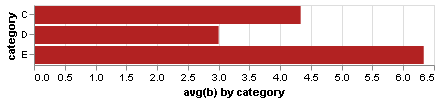

In [27]:
# Changing color
alt.Chart(data).mark_bar(color='firebrick').encode(
    alt.Y('a', title='category'),
    alt.X('average(b)', title='avg(b) by category')
)

In [28]:
# Saving HTML
chart = alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)',
)
chart.save('chart.html')

## **Simple charts**
---

### **Bar chart**

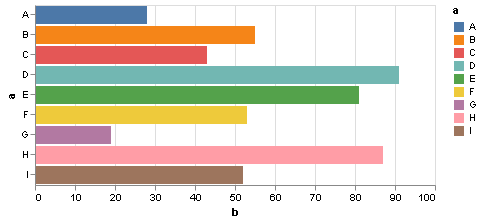

In [32]:
# Data
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

# Color by category
alt.Chart(source).mark_bar().encode(
    x='b',
    y='a',
    color='a'
)

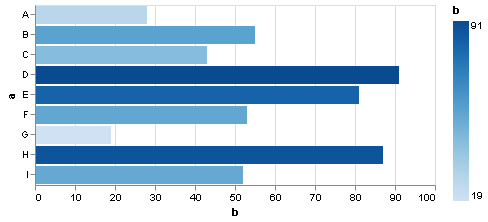

In [35]:
# Color by quantity
alt.Chart(source).mark_bar().encode(
    x='b',
    y='a',
    color='b'
)

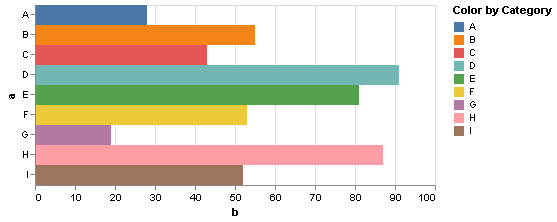

In [42]:
#  Customizing
alt.Chart(source).mark_bar(size = 20).encode(
    x='b',
    y='a',
    color=alt.Color('a', legend=alt.Legend(title="Color by Category")) # Add legend
).interactive()  # make the graph resizable

### **Heatmap**

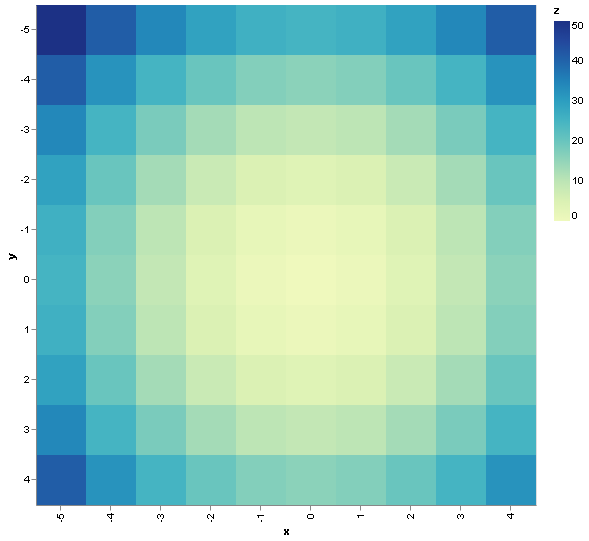

In [52]:
# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
).properties(width=500, height=500)

## **Histogram**

---

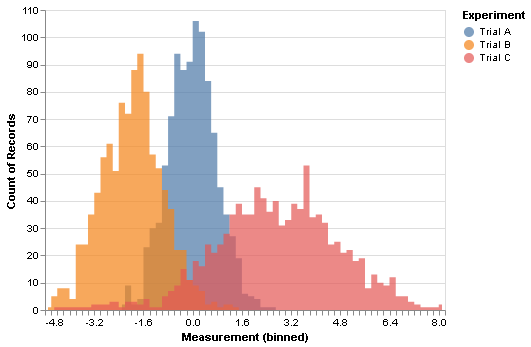

In [64]:
# Layered histogram
source = pd.DataFrame({
    'Trial A': np.random.normal(0, 0.8, 1000),
    'Trial B': np.random.normal(-2, 1, 1000),
    'Trial C': np.random.normal(3, 2, 1000)
})

alt.Chart(source).transform_fold(
    ['Trial A', 'Trial B', 'Trial C'],
    as_=['Experiment', 'Measurement']
).mark_area(
    opacity=0.7,
    interpolate='step'
).encode(
    alt.X('Measurement:Q', bin=alt.Bin(maxbins=100)),
    alt.Y('count()', stack=None),
    alt.Color('Experiment:N')
)

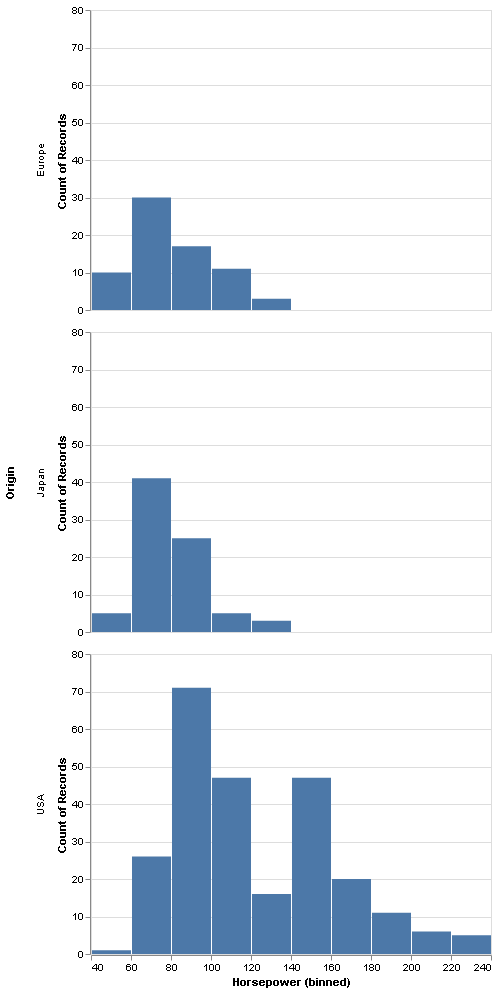

In [87]:
# Trellis Histogram
source = data.cars()

alt.Chart(source).mark_bar().encode(
    alt.X("Horsepower:Q", bin=True),
    y='count()',
    row='Origin'
)

## **Maps**

---

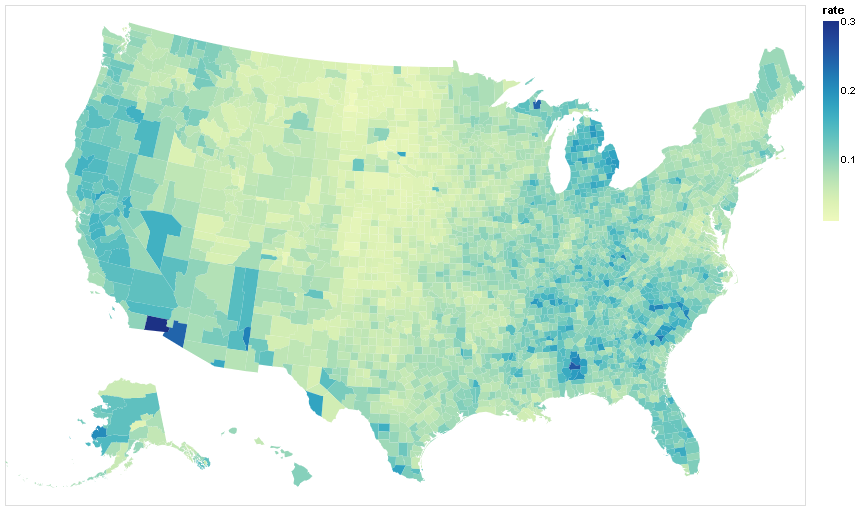

In [88]:
# Choropleth Map
counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=800,
    height=500
)

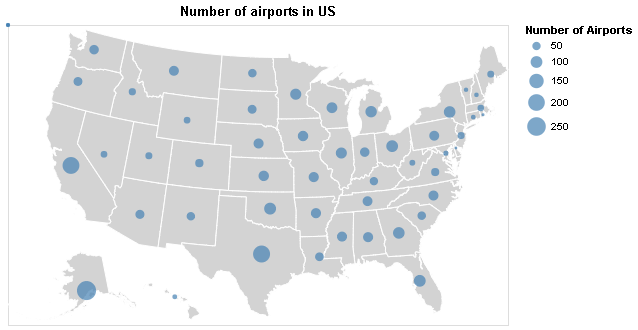

In [89]:
# Buble map
airports = data.airports.url
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# airport positions on background
points = alt.Chart(airports).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='count()',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Number of Airports'),
    color=alt.value('steelblue'),
    tooltip=['state:N','count:Q']
).properties(
    title='Number of airports in US'
)

background + points

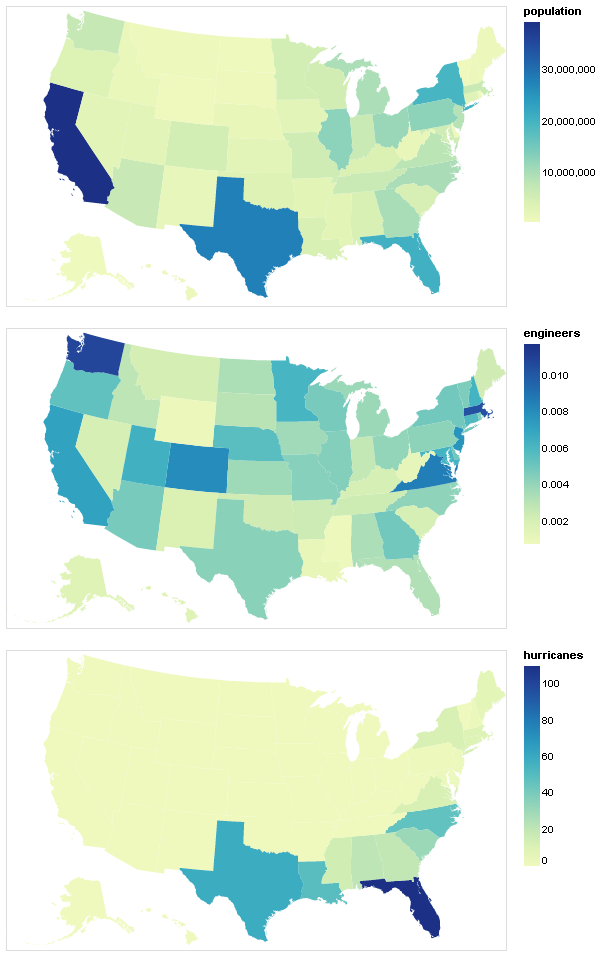

In [90]:
# Repeated Choropleth Map
states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

In [109]:
# Map with wrapped facet
states = alt.topo_feature(data.us_10m.url, 'states')
source = data.income.url

alt.Chart(source).mark_geoshape().encode(
    shape='geo:G',
    color='pct:Q',
    tooltip=['name:N', 'pct:Q'],
    facet=alt.Facet('group:N', columns=2),
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data=states, key='id'),
    as_='geo'
).properties(
    width=300,
    height=175,
).project(
    type='albersUsa'
)

ValueError: geo:G encoding field is specified without a type; the type cannot be automatically inferred because the data is not specified as a pandas.DataFrame.

alt.Chart(...)

In [110]:
# Spheric World Map

# Data generators for the background
sphere = alt.sphere()
graticule = alt.graticule()

# Source of land data
source = alt.topo_feature(data.world_110m.url, 'countries')

# Layering and configuring the components
alt.layer(
    alt.Chart(sphere).mark_geoshape(fill='lightblue'),
    alt.Chart(graticule).mark_geoshape(stroke='white', strokeWidth=0.5),
    alt.Chart(source).mark_geoshape(fill='ForestGreen', stroke='black')
).project(
    'naturalEarth1'
).properties(width=600, height=400).configure_view(stroke=None)

AttributeError: module 'altair' has no attribute 'sphere'

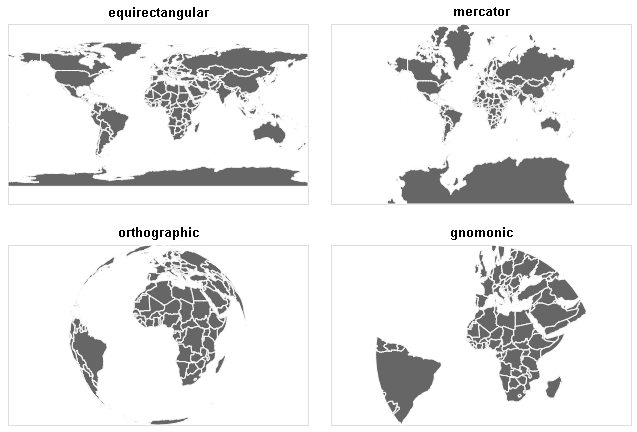

In [96]:
# World projections
source = alt.topo_feature(data.world_110m.url, 'countries')

base = alt.Chart(source).mark_geoshape(
    fill='#666666',
    stroke='white'
).properties(
    width=300,
    height=180
)

projections = ['equirectangular', 'mercator', 'orthographic', 'gnomonic']
charts = [base.project(proj).properties(title=proj)
          for proj in projections]

alt.concat(*charts, columns=2)

## **Interactive Charts**
---

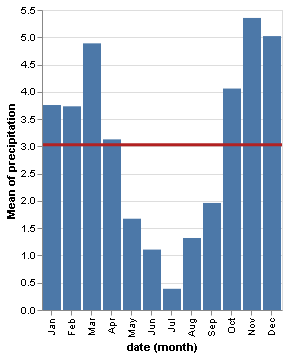

In [97]:
# Interactive Average
source = data.seattle_weather()
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='month(date):O',
    y='mean(precipitation):Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(precipitation):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

alt.layer(bars, line, data=source)

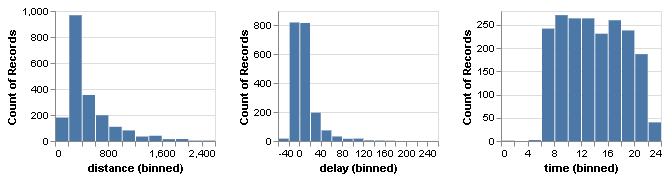

In [82]:
# Interactive crossfilter
source = alt.UrlData(
    data.flights_2k.url,
    format={'parse': {'date': 'date'}}
)

brush = alt.selection(type='interval', encodings=['x'])

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart().mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative', bin=alt.Bin(maxbins=20)),
    y='count()'
).properties(
    width=160,
    height=130
)

# gray background with selection
background = base.encode(
    color=alt.value('#ddd')
).add_selection(brush)

# blue highlights on the transformed data
highlight = base.transform_filter(brush)

# layer the two charts & repeat
alt.layer(
    background,
    highlight,
    data=source
).transform_calculate(
    "time",
    "hours(datum.date)"
).repeat(column=["distance", "delay", "time"])

In [111]:
# Interactive legend
source = data.unemployment_across_industries.url

selection = alt.selection_multi(fields=['series'], bind='legend')

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T', axis=alt.Axis(domain=False, format='%Y', tickSize=0)),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N', scale=alt.Scale(scheme='category20b')),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)

TypeError: sequence item 1: expected str instance, int found

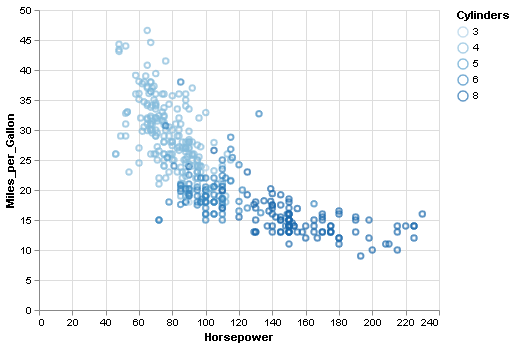

In [112]:
# Interactive Rectangular Brush
source = data.cars()
brush = alt.selection(type='interval')

alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Cylinders:O', alt.value('grey')),
).add_selection(brush)

In [ ]:
# Interactive Scatter Plot and Linked Layered Histogram

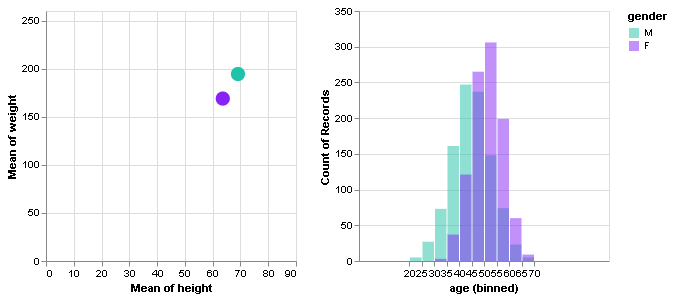

In [113]:
# generate fake data
source = pd.DataFrame({'gender': ['M']*1000 + ['F']*1000,
               'height':np.concatenate((np.random.normal(69, 7, 1000),
                                       np.random.normal(64, 6, 1000))),
               'weight': np.concatenate((np.random.normal(195.8, 144, 1000),
                                        np.random.normal(167, 100, 1000))),
               'age': np.concatenate((np.random.normal(45, 8, 1000),
                                        np.random.normal(51, 6, 1000)))
        })

selector = alt.selection_single(empty='all', fields=['gender'])

color_scale = alt.Scale(domain=['M', 'F'],
                        range=['#1FC3AA', '#8624F5'])

base = alt.Chart(source).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x=alt.X('mean(height):Q',
            scale=alt.Scale(domain=[0,84])),
    y=alt.Y('mean(weight):Q',
            scale=alt.Scale(domain=[0,250])),
    color=alt.condition(selector,
                        'gender:N',
                        alt.value('lightgray'),
                        scale=color_scale),
)

hists = base.mark_bar(opacity=0.5, thickness=100).encode(
    x=alt.X('age',
            bin=alt.Bin(step=5), # step keeps bin size the same
            scale=alt.Scale(domain=[0,100])),
    y=alt.Y('count()',
            stack=None,
            scale=alt.Scale(domain=[0,350])),
    color=alt.Color('gender:N',
                    scale=color_scale)
).transform_filter(
    selector
)


points | hists

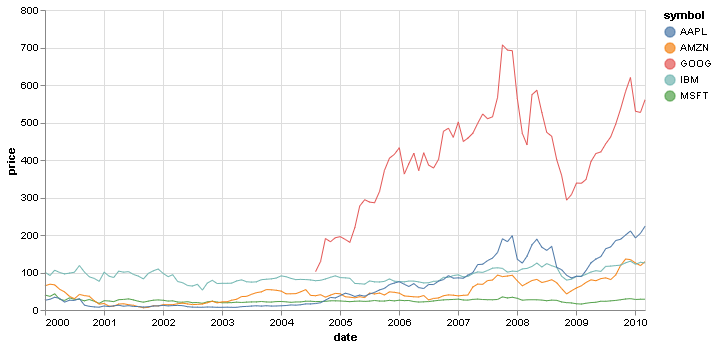

In [114]:
# Multiline Highlite
source = data.stocks()

highlight = alt.selection(type='single', on='mouseover',
                          fields=['symbol'], nearest=True)

base = alt.Chart(source).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=600
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

points + lines

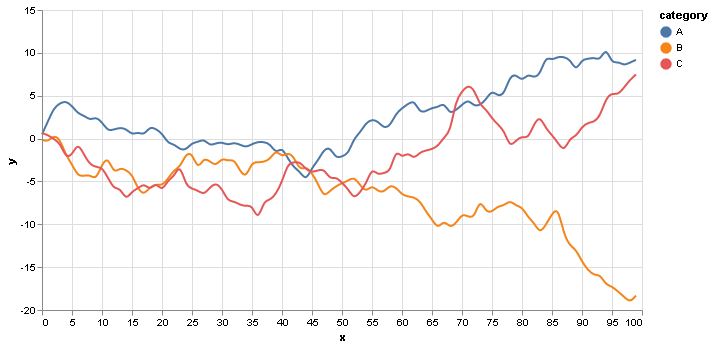

In [103]:
# Multi-Line Tooltip
np.random.seed(42)
source = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
                    columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
source = source.reset_index().melt('x', var_name='category', value_name='y')

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart(source).mark_line(interpolate='basis').encode(
    x='x:Q',
    y='y:Q',
    color='category:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)

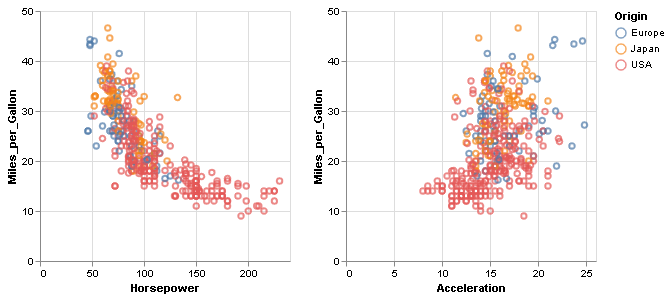

In [104]:
# Multi-panel Scatter Plot with Linked Brushing
source = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='Horsepower') | base.encode(x='Acceleration')

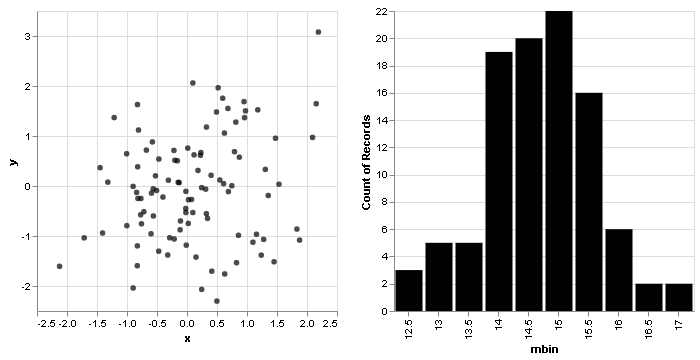

In [105]:
# Scatterplot and Histogram with interval selection
x = np.random.normal(size=100)
y = np.random.normal(size=100)

m = np.random.normal(15, 1, size=100)

source = pd.DataFrame({"x": x, "y":y, "m":m})

# interval selection in the scatter plot
pts = alt.selection(type="interval", encodings=["x"])

# left panel: scatter plot
points = alt.Chart().mark_point(filled=True, color="black").encode(
    x='x',
    y='y'
).transform_filter(
    pts
).properties(
    width=300,
    height=300
)

# right panel: histogram
mag = alt.Chart().mark_bar().encode(
    x='mbin:N',
    y="count()",
    color=alt.condition(pts, alt.value("black"), alt.value("lightgray"))
).properties(
    width=300,
    height=300
).add_selection(pts)

# build the chart:
alt.hconcat(
    points,
    mag,
    data=source
).transform_bin(
    "mbin",
    field="m",
    bin=alt.Bin(maxbins=20)
)

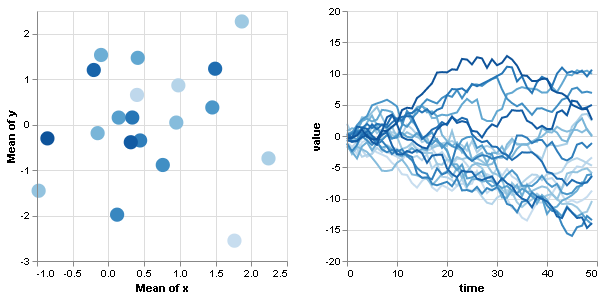

In [106]:
# Selection Detail Example
np.random.seed(0)
n_objects = 20
n_times = 50

# Create one (x, y) pair of metadata per object
locations = pd.DataFrame({
    'id': range(n_objects),
    'x': np.random.randn(n_objects),
    'y': np.random.randn(n_objects)
})

# Create a 50-element time-series for each object
timeseries = pd.DataFrame(np.random.randn(n_times, n_objects).cumsum(0),
                          columns=locations['id'],
                          index=pd.RangeIndex(0, n_times, name='time'))

# Melt the wide-form timeseries into a long-form view
timeseries = timeseries.reset_index().melt('time')

# Merge the (x, y) metadata into the long-form view
timeseries['id'] = timeseries['id'].astype(int)  # make merge not complain
data = pd.merge(timeseries, locations, on='id')

# Data is prepared, now make a chart

selector = alt.selection_single(empty='all', fields=['id'])

base = alt.Chart(data).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x='mean(x)',
    y='mean(y)',
    color=alt.condition(selector, 'id:O', alt.value('lightgray'), legend=None),
)

timeseries = base.mark_line().encode(
    x='time',
    y=alt.Y('value', scale=alt.Scale(domain=(-15, 15))),
    color=alt.Color('id:O', legend=None)
).transform_filter(
    selector
)

points | timeseries

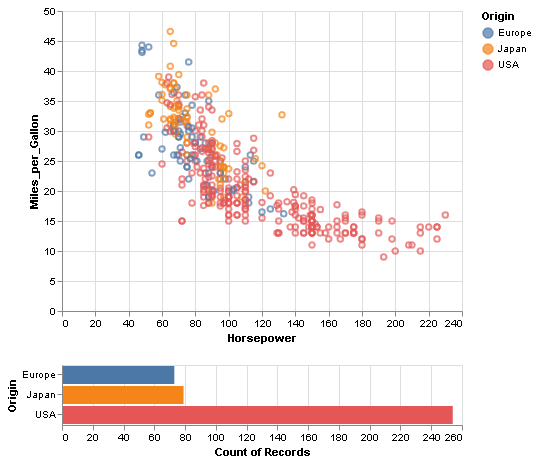

In [115]:
# Selection histogran
from vega_datasets import data
source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)

points & bars

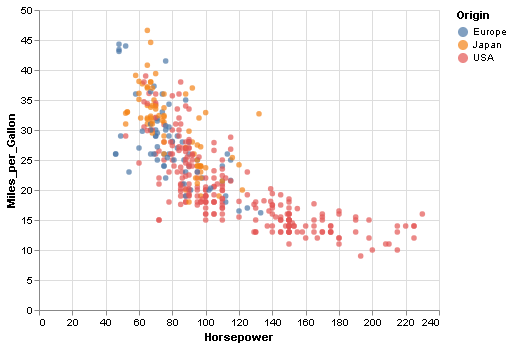

In [117]:
# Simple interactive colored scatterplot
source = data.cars()

alt.Chart(source).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

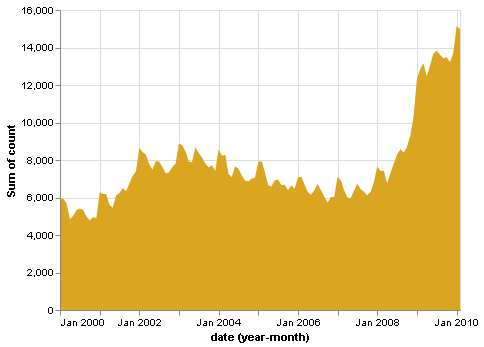

In [118]:
from vega_datasets import data
source = data.unemployment_across_industries.url

base = alt.Chart(source).mark_area(
    color='goldenrod',
    opacity=0.3
).encode(
    x='yearmonth(date):T',
    y='sum(count):Q',
)

brush = alt.selection_interval(encodings=['x'],empty='all')
background = base.add_selection(brush)
selected = base.transform_filter(brush).mark_area(color='goldenrod')

background + selected

## **Case studies**
---

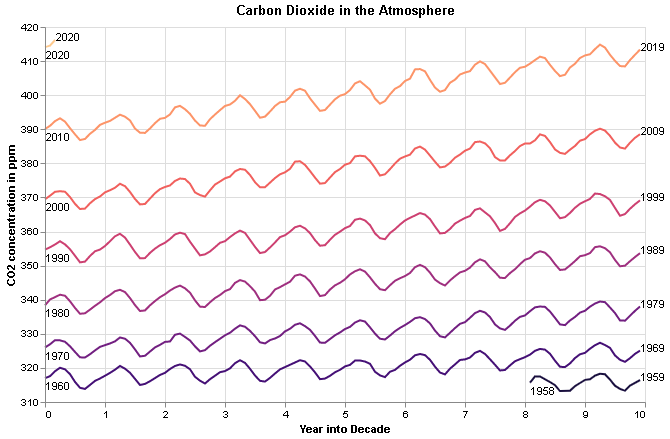

In [121]:
# Atmospheric CO2 Concentration
from vega_datasets import data
source = data.co2_concentration.url

base = alt.Chart(
    source,
    title="Carbon Dioxide in the Atmosphere"
).transform_calculate(
    year="year(datum.Date)"
).transform_calculate(
    decade="floor(datum.year / 10)"
).transform_calculate(
    scaled_date="(datum.year % 10) + (month(datum.Date)/12)"
).transform_window(
    first_date='first_value(scaled_date)',
    last_date='last_value(scaled_date)',
    sort=[{"field": "scaled_date", "order": "ascending"}],
    groupby=['decade'],
    frame=[None, None]
).transform_calculate(
  end="datum.first_date === datum.scaled_date ? 'first' : datum.last_date === datum.scaled_date ? 'last' : null"
).encode(
    x=alt.X(
        "scaled_date:Q",
        axis=alt.Axis(title="Year into Decade", tickCount=11)
    ),
    y=alt.Y(
        "CO2:Q",
        title="CO2 concentration in ppm",
        scale=alt.Scale(zero=False)
    )
)

line = base.mark_line().encode(
    color=alt.Color(
        "decade:O",
        scale=alt.Scale(scheme="magma"),
        legend=None
    )
)

text = base.encode(text="year:N")

start_year = text.transform_filter(
  alt.datum.end == 'first'
).mark_text(baseline="top")

end_year = text.transform_filter(
  alt.datum.end == 'last'
).mark_text(baseline="bottom")

(line + start_year + end_year).configure_text(
    align="left",
    dx=1,
    dy=3
).properties(width=600, height=375)

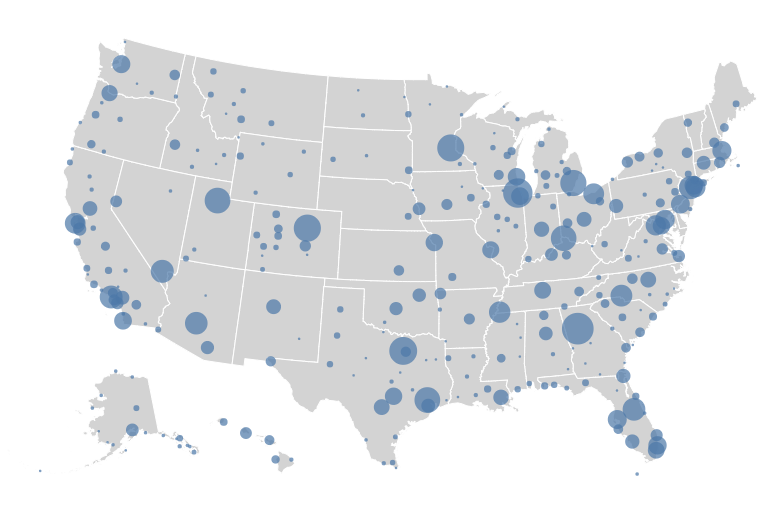

In [122]:
# Connections Among U.S. Airports Interactive
from vega_datasets import data

# Since these data are each more than 5,000 rows we'll import from the URLs
airports = data.airports.url
flights_airport = data.flights_airport.url

states = alt.topo_feature(data.us_10m.url, feature="states")

# Create mouseover selection
select_city = alt.selection_single(
    on="mouseover", nearest=True, fields=["origin"], empty="none"
)

# Define which attributes to lookup from airports.csv
lookup_data = alt.LookupData(
    airports, key="iata", fields=["state", "latitude", "longitude"]
)

background = alt.Chart(states).mark_geoshape(
    fill="lightgray",
    stroke="white"
).properties(
    width=750,
    height=500
).project("albersUsa")

connections = alt.Chart(flights_airport).mark_rule(opacity=0.35).encode(
    latitude="latitude:Q",
    longitude="longitude:Q",
    latitude2="lat2:Q",
    longitude2="lon2:Q"
).transform_lookup(
    lookup="origin",
    from_=lookup_data
).transform_lookup(
    lookup="destination",
    from_=lookup_data,
    as_=["state", "lat2", "lon2"]
).transform_filter(
    select_city
)

points = alt.Chart(flights_airport).mark_circle().encode(
    latitude="latitude:Q",
    longitude="longitude:Q",
    size=alt.Size("routes:Q", scale=alt.Scale(range=[0, 1000]), legend=None),
    order=alt.Order("routes:Q", sort="descending"),
    tooltip=["origin:N", "routes:Q"]
).transform_aggregate(
    routes="count()",
    groupby=["origin"]
).transform_lookup(
    lookup="origin",
    from_=lookup_data
).transform_filter(
    (alt.datum.state != "PR") & (alt.datum.state != "VI")
).add_selection(
    select_city
)

(background + connections + points).configure_view(stroke=None)

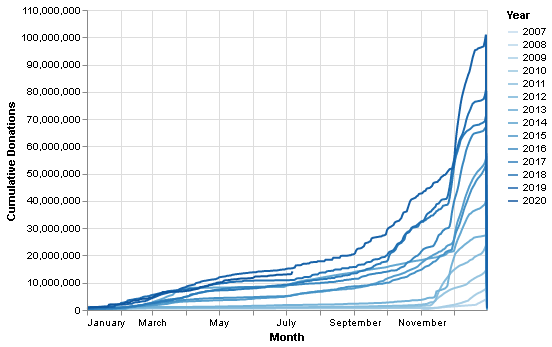

In [123]:
# Cumulative Wikipedia Donations
source = "https://frdata.wikimedia.org/donationdata-vs-day.csv"

alt.Chart(source).mark_line().encode(
    alt.X('monthdate(date):T', title='Month', axis=alt.Axis(format='%B')),
    alt.Y('max(ytdsum):Q', title='Cumulative Donations', stack=None),
    alt.Color('year(date):O', legend=alt.Legend(title='Year')),
    alt.Order('year(data):O')
)

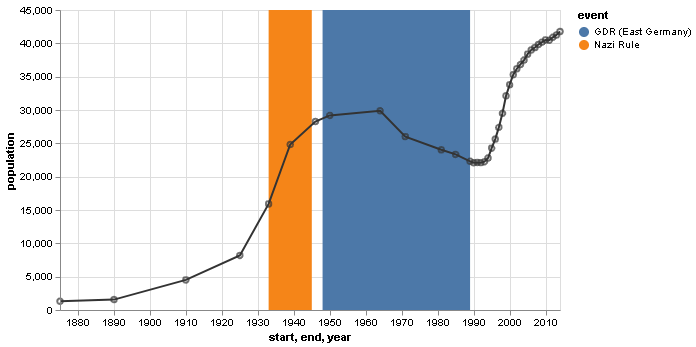

In [125]:
# Falkensee
source = [
      {"year": "1875", "population": 1309},
      {"year": "1890", "population": 1558},
      {"year": "1910", "population": 4512},
      {"year": "1925", "population": 8180},
      {"year": "1933", "population": 15915},
      {"year": "1939", "population": 24824},
      {"year": "1946", "population": 28275},
      {"year": "1950", "population": 29189},
      {"year": "1964", "population": 29881},
      {"year": "1971", "population": 26007},
      {"year": "1981", "population": 24029},
      {"year": "1985", "population": 23340},
      {"year": "1989", "population": 22307},
      {"year": "1990", "population": 22087},
      {"year": "1991", "population": 22139},
      {"year": "1992", "population": 22105},
      {"year": "1993", "population": 22242},
      {"year": "1994", "population": 22801},
      {"year": "1995", "population": 24273},
      {"year": "1996", "population": 25640},
      {"year": "1997", "population": 27393},
      {"year": "1998", "population": 29505},
      {"year": "1999", "population": 32124},
      {"year": "2000", "population": 33791},
      {"year": "2001", "population": 35297},
      {"year": "2002", "population": 36179},
      {"year": "2003", "population": 36829},
      {"year": "2004", "population": 37493},
      {"year": "2005", "population": 38376},
      {"year": "2006", "population": 39008},
      {"year": "2007", "population": 39366},
      {"year": "2008", "population": 39821},
      {"year": "2009", "population": 40179},
      {"year": "2010", "population": 40511},
      {"year": "2011", "population": 40465},
      {"year": "2012", "population": 40905},
      {"year": "2013", "population": 41258},
      {"year": "2014", "population": 41777}
    ]

source2 = [{
            "start": "1933",
            "end": "1945",
            "event": "Nazi Rule"
          },
          {
            "start": "1948",
            "end": "1989",
            "event": "GDR (East Germany)"
          }]


source = alt.pd.DataFrame(source)
source2 = alt.pd.DataFrame(source2)


line = alt.Chart(source).mark_line(color='#333').encode(
    alt.X('year:T', axis=alt.Axis(format='%Y')),
    y='population'
).properties(
    width=500,
    height=300
)

point = line.mark_point(color='#333')

rect = alt.Chart(source2).mark_rect().encode(
    x='start:T',
    x2='end:T',
    color='event:N'
)

rect + line + point

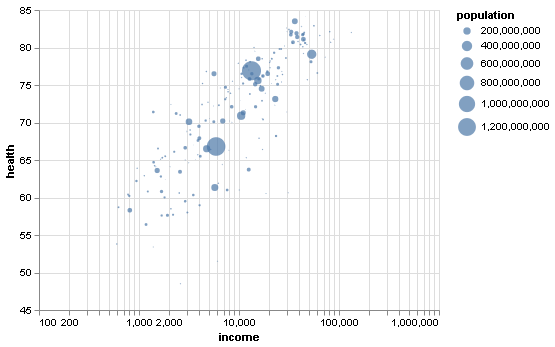

In [126]:
# Gapminder Bubble Plot
source = data.gapminder_health_income.url

alt.Chart(source).mark_circle().encode(
    alt.X('income:Q', scale=alt.Scale(type='log')),
    alt.Y('health:Q', scale=alt.Scale(zero=False)),
    size='population:Q'
)

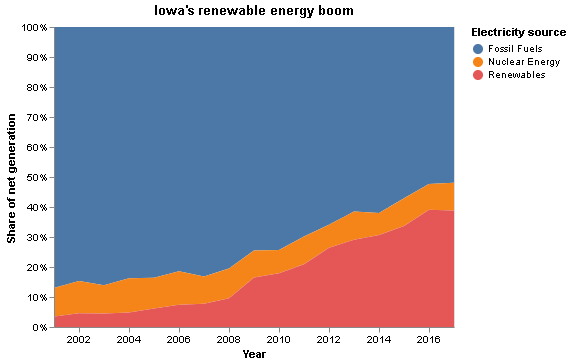

In [128]:
# Iowa’s renewable energy boom
source = data.iowa_electricity()

alt.Chart(source, title="Iowa's renewable energy boom").mark_area().encode(
    x=alt.X(
        "year:T",
        title="Year"
    ),
    y=alt.Y(
        "net_generation:Q",
        stack="normalize",
        title="Share of net generation",
        axis=alt.Axis(format=".0%"),
    ),
    color=alt.Color(
        "source:N",
        legend=alt.Legend(title="Electricity source"),
    )
)

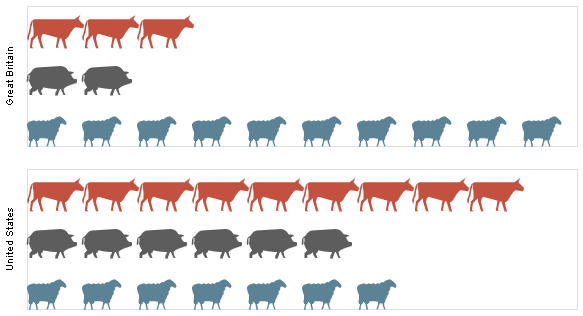

In [129]:
# Isotype Visualization
source = pd.DataFrame([
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'}
    ])

domains = ['person', 'cattle', 'pigs', 'sheep']

shape_scale = alt.Scale(
    domain=domains,
    range=[
        'M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 -0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 -0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 -0.6 -0.4 -0.6z',
        'M4 -2c0 0 0.9 -0.7 1.1 -0.8c0.1 -0.1 -0.1 0.5 -0.3 0.7c-0.2 0.2 1.1 1.1 1.1 1.2c0 0.2 -0.2 0.8 -0.4 0.7c-0.1 0 -0.8 -0.3 -1.3 -0.2c-0.5 0.1 -1.3 1.6 -1.5 2c-0.3 0.4 -0.6 0.4 -0.6 0.4c0 0.1 0.3 1.7 0.4 1.8c0.1 0.1 -0.4 0.1 -0.5 0c0 0 -0.6 -1.9 -0.6 -1.9c-0.1 0 -0.3 -0.1 -0.3 -0.1c0 0.1 -0.5 1.4 -0.4 1.6c0.1 0.2 0.1 0.3 0.1 0.3c0 0 -0.4 0 -0.4 0c0 0 -0.2 -0.1 -0.1 -0.3c0 -0.2 0.3 -1.7 0.3 -1.7c0 0 -2.8 -0.9 -2.9 -0.8c-0.2 0.1 -0.4 0.6 -0.4 1c0 0.4 0.5 1.9 0.5 1.9l-0.5 0l-0.6 -2l0 -0.6c0 0 -1 0.8 -1 1c0 0.2 -0.2 1.3 -0.2 1.3c0 0 0.3 0.3 0.2 0.3c0 0 -0.5 0 -0.5 0c0 0 -0.2 -0.2 -0.1 -0.4c0 -0.1 0.2 -1.6 0.2 -1.6c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 0 -2.7 -0.2 -2.7c-0.1 0 -0.4 2 -0.4 2c0 0 0 0.2 -0.2 0.5c-0.1 0.4 -0.2 1.1 -0.2 1.1c0 0 -0.2 -0.1 -0.2 -0.2c0 -0.1 -0.1 -0.7 0 -0.7c0.1 -0.1 0.3 -0.8 0.4 -1.4c0 -0.6 0.2 -1.3 0.4 -1.5c0.1 -0.2 0.6 -0.4 0.6 -0.4z',
        'M1.2 -2c0 0 0.7 0 1.2 0.5c0.5 0.5 0.4 0.6 0.5 0.6c0.1 0 0.7 0 0.8 0.1c0.1 0 0.2 0.2 0.2 0.2c0 0 -0.6 0.2 -0.6 0.3c0 0.1 0.4 0.9 0.6 0.9c0.1 0 0.6 0 0.6 0.1c0 0.1 0 0.7 -0.1 0.7c-0.1 0 -1.2 0.4 -1.5 0.5c-0.3 0.1 -1.1 0.5 -1.1 0.7c-0.1 0.2 0.4 1.2 0.4 1.2l-0.4 0c0 0 -0.4 -0.8 -0.4 -0.9c0 -0.1 -0.1 -0.3 -0.1 -0.3l-0.2 0l-0.5 1.3l-0.4 0c0 0 -0.1 -0.4 0 -0.6c0.1 -0.1 0.3 -0.6 0.3 -0.7c0 0 -0.8 0 -1.5 -0.1c-0.7 -0.1 -1.2 -0.3 -1.2 -0.2c0 0.1 -0.4 0.6 -0.5 0.6c0 0 0.3 0.9 0.3 0.9l-0.4 0c0 0 -0.4 -0.5 -0.4 -0.6c0 -0.1 -0.2 -0.6 -0.2 -0.5c0 0 -0.4 0.4 -0.6 0.4c-0.2 0.1 -0.4 0.1 -0.4 0.1c0 0 -0.1 0.6 -0.1 0.6l-0.5 0l0 -1c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 -0.7 -1.2 -0.6 -1.4c0.1 -0.1 0.1 -1.1 0.1 -1.1c0 0 -0.2 0.1 -0.2 0.1c0 0 0 0.9 0 1c0 0.1 -0.2 0.3 -0.3 0.3c-0.1 0 0 -0.5 0 -0.9c0 -0.4 0 -0.4 0.2 -0.6c0.2 -0.2 0.6 -0.3 0.8 -0.8c0.3 -0.5 1 -0.6 1 -0.6z',
        'M-4.1 -0.5c0.2 0 0.2 0.2 0.5 0.2c0.3 0 0.3 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.4 -0.2c0.1 0 0.2 0.2 0.4 0.1c0.2 0 0.2 -0.2 0.4 -0.3c0.1 0 0.1 -0.1 0.4 0c0.3 0 0.3 -0.4 0.6 -0.4c0.3 0 0.6 -0.3 0.7 -0.2c0.1 0.1 1.4 1 1.3 1.4c-0.1 0.4 -0.3 0.3 -0.4 0.3c-0.1 0 -0.5 -0.4 -0.7 -0.2c-0.3 0.2 -0.1 0.4 -0.2 0.6c-0.1 0.1 -0.2 0.2 -0.3 0.4c0 0.2 0.1 0.3 0 0.5c-0.1 0.2 -0.3 0.2 -0.3 0.5c0 0.3 -0.2 0.3 -0.3 0.6c-0.1 0.2 0 0.3 -0.1 0.5c-0.1 0.2 -0.1 0.2 -0.2 0.3c-0.1 0.1 0.3 1.1 0.3 1.1l-0.3 0c0 0 -0.3 -0.9 -0.3 -1c0 -0.1 -0.1 -0.2 -0.3 -0.2c-0.2 0 -0.3 0.1 -0.4 0.4c0 0.3 -0.2 0.8 -0.2 0.8l-0.3 0l0.3 -1c0 0 0.1 -0.6 -0.2 -0.5c-0.3 0.1 -0.2 -0.1 -0.4 -0.1c-0.2 -0.1 -0.3 0.1 -0.4 0c-0.2 -0.1 -0.3 0.1 -0.5 0c-0.2 -0.1 -0.1 0 -0.3 0.3c-0.2 0.3 -0.4 0.3 -0.4 0.3l0.2 1.1l-0.3 0l-0.2 -1.1c0 0 -0.4 -0.6 -0.5 -0.4c-0.1 0.3 -0.1 0.4 -0.3 0.4c-0.1 -0.1 -0.2 1.1 -0.2 1.1l-0.3 0l0.2 -1.1c0 0 -0.3 -0.1 -0.3 -0.5c0 -0.3 0.1 -0.5 0.1 -0.7c0.1 -0.2 -0.1 -1 -0.2 -1.1c-0.1 -0.2 -0.2 -0.8 -0.2 -0.8c0 0 -0.1 -0.5 0.4 -0.8z'
    ]
)

color_scale = alt.Scale(
    domain=domains,
    range=['rgb(162,160,152)', 'rgb(194,81,64)', 'rgb(93,93,93)', 'rgb(91,131,149)']
)

alt.Chart(source).mark_point(filled=True, opacity=1, size=100).encode(
    alt.X('x:O', axis=None),
    alt.Y('animal:O', axis=None),
    alt.Row('country:N', header=alt.Header(title='')),
    alt.Shape('animal:N', legend=None, scale=shape_scale),
    alt.Color('animal:N', legend=None, scale=color_scale),
).transform_window(
    x='rank()',
    groupby=['country', 'animal']
).properties(width=550, height=140)

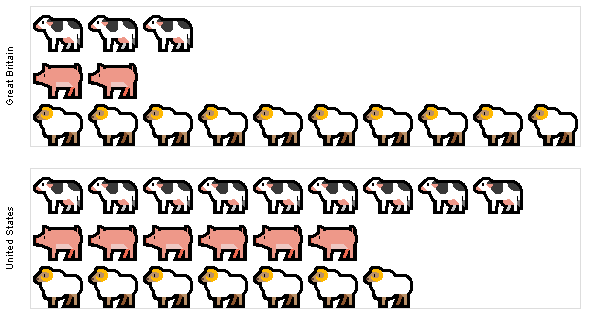

In [131]:
# Isotype Visualization with Emoji
source = pd.DataFrame([
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'}
    ])


alt.Chart(source).mark_text(size=45, baseline='middle').encode(
    alt.X('x:O', axis=None),
    alt.Y('animal:O', axis=None),
    alt.Row('country:N', header=alt.Header(title='')),
    alt.Text('emoji:N')
).transform_calculate(
    emoji="{'cattle': '🐄', 'pigs': '🐖', 'sheep': '🐏'}[datum.animal]"
).transform_window(
    x='rank()',
    groupby=['country', 'animal']
).properties(width=550, height=140)


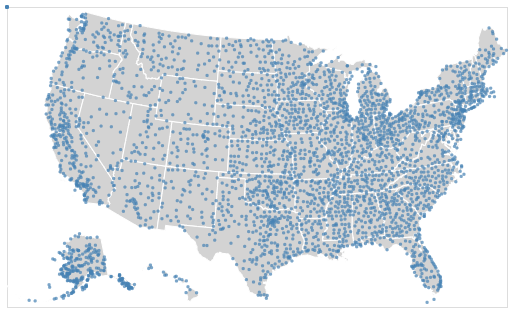

In [132]:
# Locations of US Airports
airports = data.airports()
states = alt.topo_feature(data.us_10m.url, feature='states')

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# airport positions on background
points = alt.Chart(airports).mark_circle(
    size=10,
    color='steelblue'
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    tooltip=['name', 'city', 'state']
)

background + points

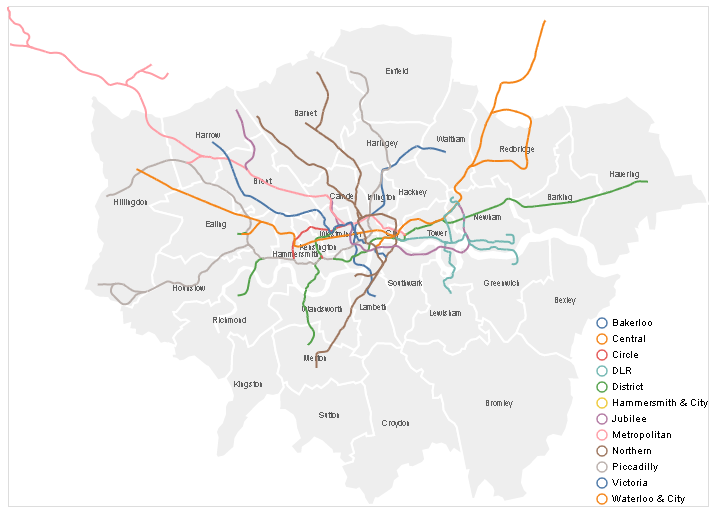

In [134]:
# London Tube Lines
boroughs = alt.topo_feature(data.londonBoroughs.url, 'boroughs')
tubelines = alt.topo_feature(data.londonTubeLines.url, 'line')
centroids = data.londonCentroids.url

background = alt.Chart(boroughs).mark_geoshape(
    stroke='white',
    strokeWidth=2
).encode(
    color=alt.value('#eee'),
).properties(
    width=700,
    height=500
)

labels = alt.Chart(centroids).mark_text().encode(
    longitude='cx:Q',
    latitude='cy:Q',
    text='bLabel:N',
    size=alt.value(8),
    opacity=alt.value(0.6)
).transform_calculate(
    "bLabel", "indexof (datum.name,' ') > 0  ? substring(datum.name,0,indexof(datum.name, ' ')) : datum.name"
)

line_scale = alt.Scale(domain=["Bakerloo", "Central", "Circle", "District", "DLR",
                               "Hammersmith & City", "Jubilee", "Metropolitan", "Northern",
                               "Piccadilly", "Victoria", "Waterloo & City" ],
                       range=["rgb(137,78,36)", "rgb(220,36,30)", "rgb(255,206,0)",
                              "rgb(1,114,41)", "rgb(0,175,173)", "rgb(215,153,175)",
                              "rgb(106,114,120)", "rgb(114,17,84)", "rgb(0,0,0)",
                              "rgb(0,24,168)", "rgb(0,160,226)", "rgb(106,187,170)"])

lines = alt.Chart(tubelines).mark_geoshape(
    filled=False,
    strokeWidth=2
).encode(
    alt.Color(
        'id:N',
        legend=alt.Legend(
            title=None,
            orient='bottom-right',
            offset=0
        )
    )
)

background + labels + lines

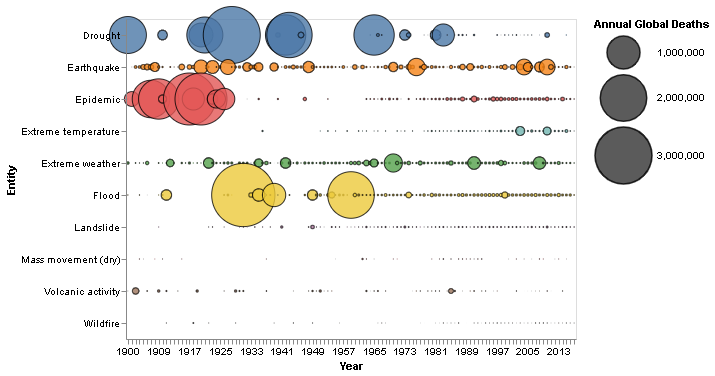

In [136]:
# Natural Disasters
from vega_datasets import data

source = data.disasters.url

alt.Chart(source).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('Year:O', axis=alt.Axis(labelAngle=0)),
    alt.Y('Entity:N'),
    alt.Size('Deaths:Q',
        scale=alt.Scale(range=[0, 4000]),
        legend=alt.Legend(title='Annual Global Deaths')
    ),
    alt.Color('Entity:N', legend=None)
).properties(
    width=450,
    height=320
).transform_filter(
    alt.datum.Entity != 'All natural disasters'
)

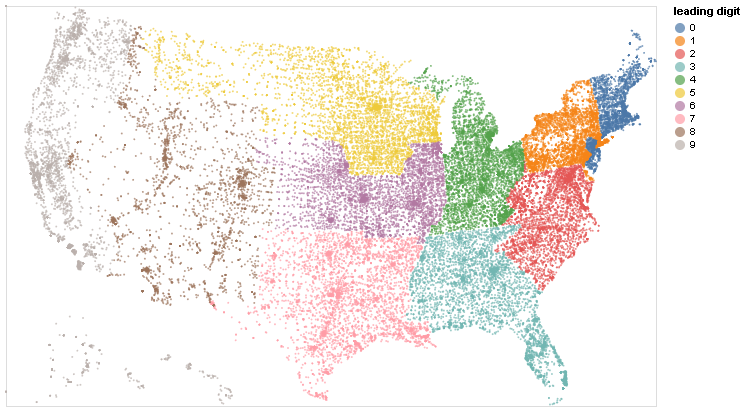

In [137]:
# One Dot Per Zipcode
from vega_datasets import data

# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(source).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='leading digit:N',
    tooltip='zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
)


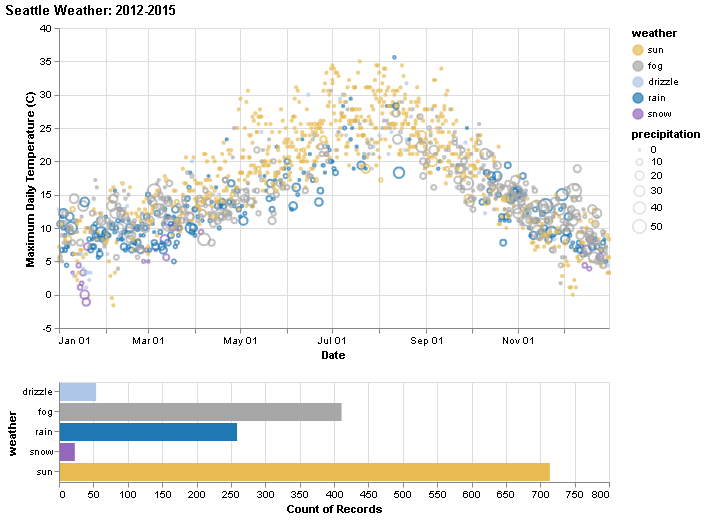

In [138]:
# Seattle Weather Interactive
from vega_datasets import data

source = data.seattle_weather()

scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('weather:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('monthdate(date):T', title='Date'),
    alt.Y('temp_max:Q',
        title='Maximum Daily Temperature (C)',
        scale=alt.Scale(domain=[-5, 40])
    ),
    color=alt.condition(brush, color, alt.value('lightgray')),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[5, 200]))
).properties(
    width=550,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)

alt.vconcat(
    points,
    bars,
    data=source,
    title="Seattle Weather: 2012-2015"
)

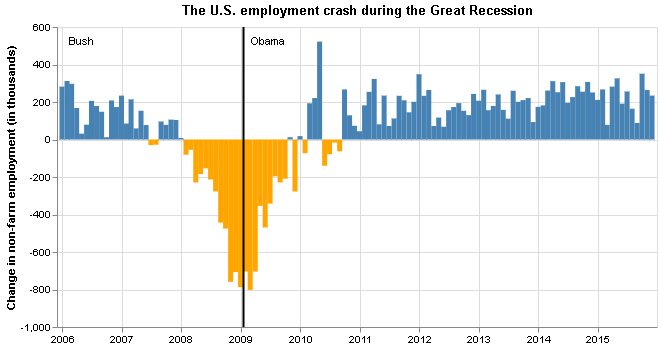

In [139]:
# The U.S. employment crash during the Great Recession
from vega_datasets import data

source = data.us_employment()
presidents = pd.DataFrame([
    {
        "start": "2006-01-01",
        "end": "2009-01-19",
        "president": "Bush"
    },
    {
        "start": "2009-01-20",
        "end": "2015-12-31",
        "president": "Obama"
    }
])

bars = alt.Chart(
    source,
    title="The U.S. employment crash during the Great Recession"
).mark_bar().encode(
    x=alt.X("month:T", title=""),
    y=alt.Y("nonfarm_change:Q", title="Change in non-farm employment (in thousands)"),
    color=alt.condition(
        alt.datum.nonfarm_change > 0,
        alt.value("steelblue"),
        alt.value("orange")
    )
)

rule = alt.Chart(presidents).mark_rule(
    color="black",
    strokeWidth=2
).encode(
    x='end:T'
).transform_filter(alt.datum.president == "Bush")

text = alt.Chart(presidents).mark_text(
    align='left',
    baseline='middle',
    dx=7,
    dy=-135,
    size=11
).encode(
    x='start:T',
    x2='end:T',
    text='president',
    color=alt.value('#000000')
)

(bars + rule + text).properties(width=600)

In [141]:
# Top K letters
import altair as alt
import pandas as pd
import numpy as np
# Excerpt from A Tale of Two Cities; public domain text
text = """
It was the best of times, it was the worst of times, it was the age of wisdom,
it was the age of foolishness, it was the epoch of belief, it was the epoch of
incredulity, it was the season of Light, it was the season of Darkness, it was
the spring of hope, it was the winter of despair, we had everything before us,
we had nothing before us, we were all going direct to Heaven, we were all going
direct the other way - in short, the period was so far like the present period,
that some of its noisiest authorities insisted on its being received, for good
or for evil, in the superlative degree of comparison only.
"""

source = pd.DataFrame(
    {'letters': np.array([c for c in text if c.isalpha()])}
)

alt.Chart(source).transform_aggregate(
    count='count()',
    groupby=['letters']
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).transform_filter(
    alt.datum.rank < 10
).mark_bar().encode(
    y=alt.Y('letters:N', sort='-x'),
    x='count:Q',
)

TypeError: sequence item 1: expected str instance, int found

alt.Chart(...)

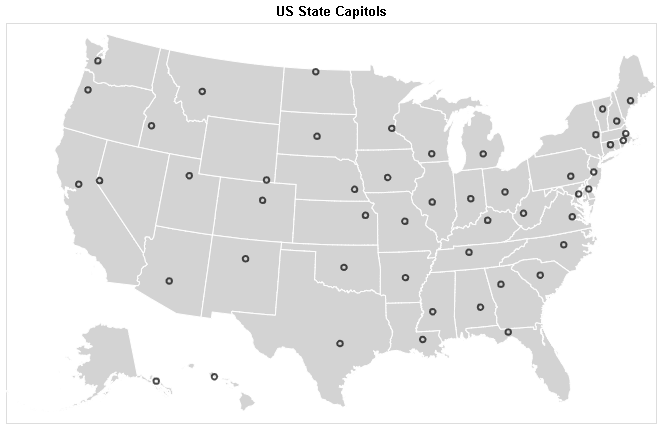

In [143]:
# U.S. state capitals overlayed on a map of the U.S
states = alt.topo_feature(data.us_10m.url, 'states')
capitals = data.us_state_capitals.url

# US states background
background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    title='US State Capitols',
    width=650,
    height=400
).project('albersUsa')

# Points and text
hover = alt.selection(type='single', on='mouseover', nearest=True,
                      fields=['lat', 'lon'])

base = alt.Chart(capitals).encode(
    longitude='lon:Q',
    latitude='lat:Q',
)

text = base.mark_text(dy=-5, align='right').encode(
    alt.Text('city', type='nominal'),
    opacity=alt.condition(~hover, alt.value(0), alt.value(1))
)

points = base.mark_point().encode(
    color=alt.value('black'),
    size=alt.condition(~hover, alt.value(30), alt.value(100))
).add_selection(hover)

background + points + text

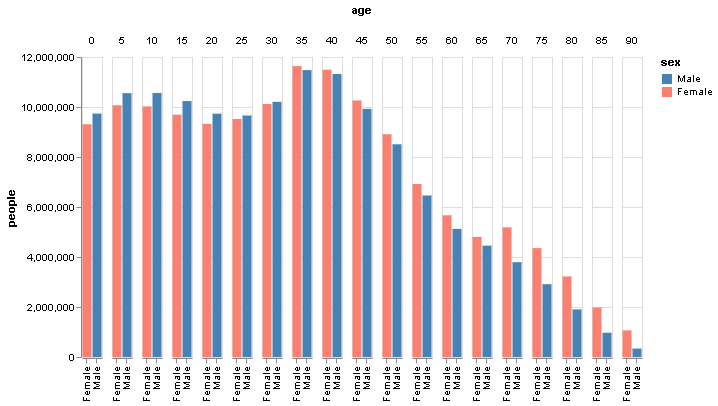

In [144]:
# US Population Over Time
source = data.population.url

pink_blue = alt.Scale(domain=('Male', 'Female'),
                      range=["steelblue", "salmon"])

slider = alt.binding_range(min=1900, max=2000, step=10)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2000})

alt.Chart(source).mark_bar().encode(
    x=alt.X('sex:N', title=None),
    y=alt.Y('people:Q', scale=alt.Scale(domain=(0, 12000000))),
    color=alt.Color('sex:N', scale=pink_blue),
    column='age:O'
).properties(
    width=20
).add_selection(
    select_year
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female")
).transform_filter(
    select_year
).configure_facet(
    spacing=8
)

## **Other charts**
---

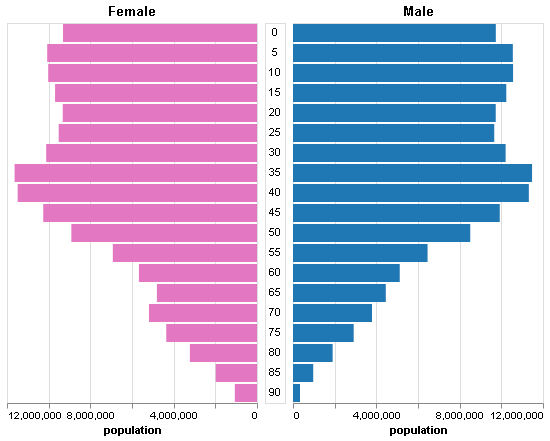

In [145]:
# US Population Pyramid Over Time
source = data.population.url

slider = alt.binding_range(min=1850, max=2000, step=10)
select_year = alt.selection_single(name='year', fields=['year'],
                                   bind=slider, init={'year': 2000})

base = alt.Chart(source).add_selection(
    select_year
).transform_filter(
    select_year
).transform_calculate(
    gender=alt.expr.if_(alt.datum.sex == 1, 'Male', 'Female')
).properties(
    width=250
)


color_scale = alt.Scale(domain=['Male', 'Female'],
                        range=['#1f77b4', '#e377c2'])

left = base.transform_filter(
    alt.datum.gender == 'Female'
).encode(
    y=alt.Y('age:O', axis=None),
    x=alt.X('sum(people):Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('gender:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Female')

middle = base.encode(
    y=alt.Y('age:O', axis=None),
    text=alt.Text('age:Q'),
).mark_text().properties(width=20)

right = base.transform_filter(
    alt.datum.gender == 'Male'
).encode(
    y=alt.Y('age:O', axis=None),
    x=alt.X('sum(people):Q', title='population'),
    color=alt.Color('gender:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Male')

alt.concat(left, middle, right, spacing=5)

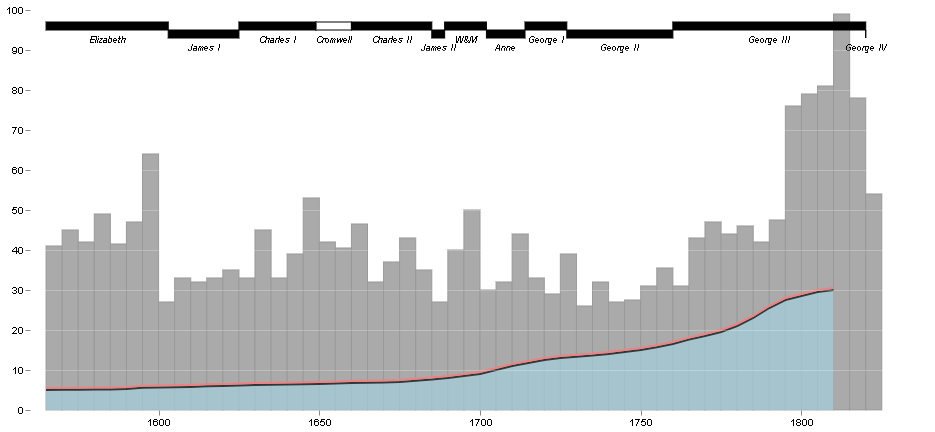

In [147]:
# Wheat and Wages
base_wheat = alt.Chart(data.wheat.url).transform_calculate(
    year_end="+datum.year + 5")

base_monarchs = alt.Chart(data.monarchs.url).transform_calculate(
    offset="((!datum.commonwealth && datum.index % 2) ? -1: 1) * 2 + 95",
    off2="((!datum.commonwealth && datum.index % 2) ? -1: 1) + 95",
    y="95",
    x="+datum.start + (+datum.end - +datum.start)/2"
)

bars = base_wheat.mark_bar(**{"fill": "#aaa", "stroke": "#999"}).encode(
    x=alt.X("year:Q", axis=alt.Axis(format='d', tickCount=5)),
    y=alt.Y("wheat:Q", axis=alt.Axis(zindex=1)),
    x2=alt.X2("year_end")
)

area = base_wheat.mark_area(**{"color": "#a4cedb", "opacity": 0.7}).encode(
    x=alt.X("year:Q"),
    y=alt.Y("wages:Q")
)

area_line_1 = area.mark_line(**{"color": "#000", "opacity": 0.7})
area_line_2 = area.mark_line(**{"yOffset": -2, "color": "#EE8182"})

top_bars = base_monarchs.mark_bar(stroke="#000").encode(
    x=alt.X("start:Q"),
    x2=alt.X2("end"),
    y=alt.Y("y:Q"),
    y2=alt.Y2("offset"),
    fill=alt.Fill("commonwealth:N", legend=None, scale=alt.Scale(range=["black", "white"]))
)

top_text = base_monarchs.mark_text(**{"yOffset": 14, "fontSize": 9, "fontStyle": "italic"}).encode(
    x=alt.X("x:Q"),
    y=alt.Y("off2:Q"),
    text=alt.Text("name:N")
)

(bars + area + area_line_1 + area_line_2 + top_bars + top_text).properties(
    width=900, height=400
).configure_axis(
    title=None, gridColor="white", gridOpacity=0.25, domain=False
).configure_view(
    stroke="transparent"
)

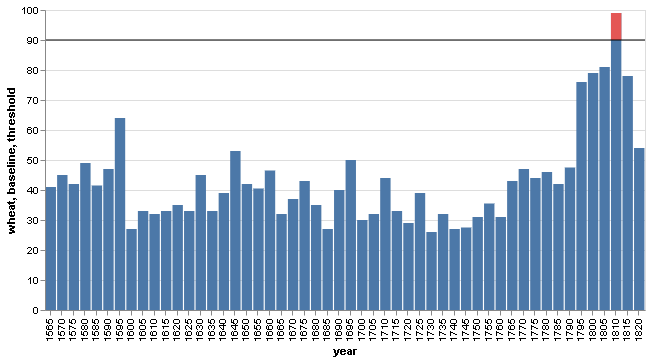

In [148]:
# Bar Chart with Highlighted Segment
source = data.wheat()
threshold = pd.DataFrame([{"threshold": 90}])

bars = alt.Chart(source).mark_bar().encode(
    x="year:O",
    y="wheat:Q",
)

highlight = alt.Chart(source).mark_bar(color="#e45755").encode(
    x='year:O',
    y='baseline:Q',
    y2='wheat:Q'
).transform_filter(
    alt.datum.wheat > 90
).transform_calculate("baseline", "90")

rule = alt.Chart(threshold).mark_rule().encode(
    y='threshold:Q'
)

(bars + highlight + rule).properties(width=600)

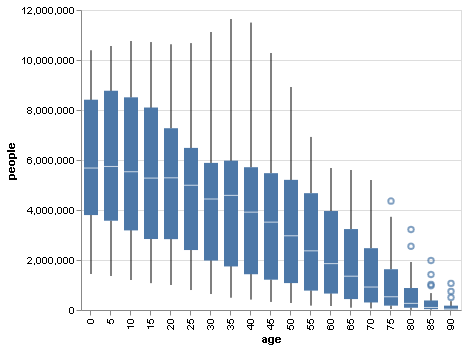

In [151]:
# Box Plot with Min/Max Whiskers
source = data.population.url

alt.Chart(source).mark_boxplot().encode(
    x='age:O',
    y='people:Q'
)

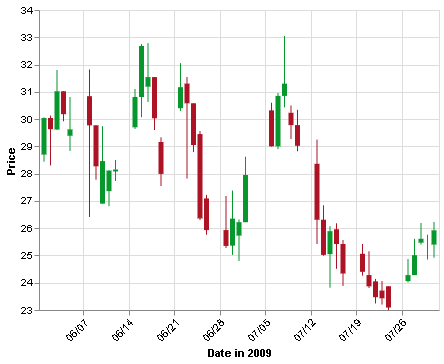

In [152]:
# Candlestick Chart
source = data.ohlc()

open_close_color = alt.condition("datum.open <= datum.close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

base = alt.Chart(source).encode(
    alt.X('date:T',
          axis=alt.Axis(
              format='%m/%d',
              labelAngle=-45,
              title='Date in 2009'
          )
    ),
    color=open_close_color
)

rule = base.mark_rule().encode(
    alt.Y(
        'low:Q',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    alt.Y2('high:Q')
)

bar = base.mark_bar().encode(
    alt.Y('open:Q'),
    alt.Y2('close:Q')
)

rule + bar

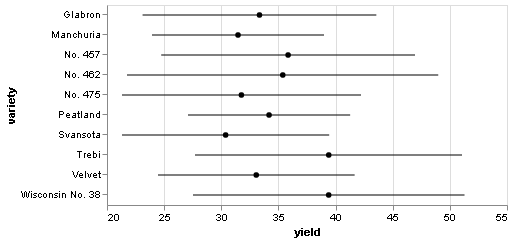

In [153]:
# Error Bar with Standard Deviation
source = data.barley()

error_bars = alt.Chart(source).mark_errorbar(extent='stdev').encode(
  x=alt.X('yield:Q', scale=alt.Scale(zero=False)),
  y=alt.Y('variety:N')
)

points = alt.Chart(source).mark_point(filled=True, color='black').encode(
  x=alt.X('yield:Q', aggregate='mean'),
  y=alt.Y('variety:N'),
)

error_bars + points

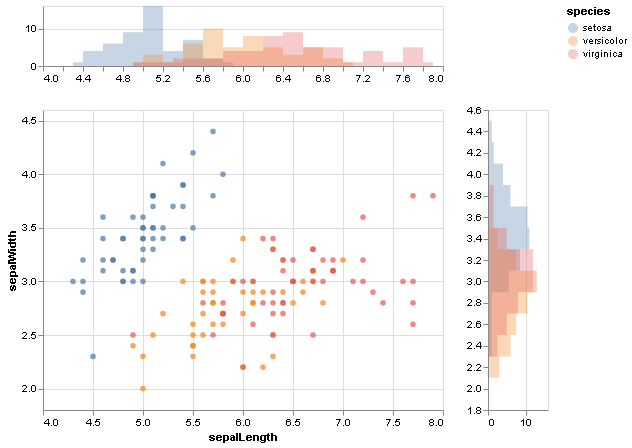

In [154]:
# Facetted Scatterplot with marginal histograms
from vega_datasets import data

source = data.iris()

base = alt.Chart(source)

xscale = alt.Scale(domain=(4.0, 8.0))
yscale = alt.Scale(domain=(1.9, 4.55))

area_args = {'opacity': .3, 'interpolate': 'step'}

points = base.mark_circle().encode(
    alt.X('sepalLength', scale=xscale),
    alt.Y('sepalWidth', scale=yscale),
    color='species',
)

top_hist = base.mark_area(**area_args).encode(
    alt.X('sepalLength:Q',
          # when using bins, the axis scale is set through
          # the bin extent, so we do not specify the scale here
          # (which would be ignored anyway)
          bin=alt.Bin(maxbins=20, extent=xscale.domain),
          stack=None,
          title=''
         ),
    alt.Y('count()', stack=None, title=''),
    alt.Color('species:N'),
).properties(height=60)

right_hist = base.mark_area(**area_args).encode(
    alt.Y('sepalWidth:Q',
          bin=alt.Bin(maxbins=20, extent=yscale.domain),
          stack=None,
          title='',
         ),
    alt.X('count()', stack=None, title=''),
    alt.Color('species:N'),
).properties(width=60)

top_hist & (points | right_hist)

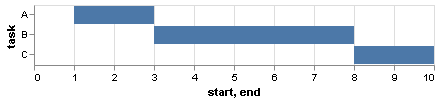

In [156]:
# Gantt Chart
source = pd.DataFrame([
    {"task": "A", "start": 1, "end": 3},
    {"task": "B", "start": 3, "end": 8},
    {"task": "C", "start": 8, "end": 10}
])

alt.Chart(source).mark_bar().encode(
    x='start',
    x2='end',
    y='task'
)

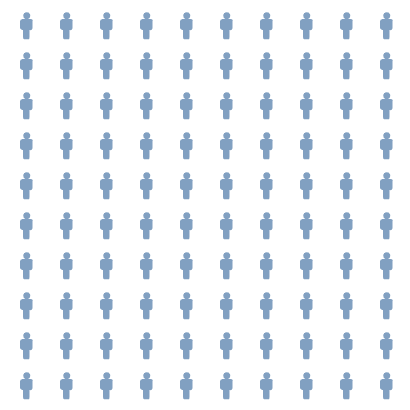

In [158]:
# Isotype Grid
data = pd.DataFrame([dict(id=i) for i in range(1, 101)])

person = (
    "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 "
    "-0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 "
    "0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 "
    "0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 "
    "0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 "
    "-0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 "
    "-0.6 -0.4 -0.6z"
)

alt.Chart(data).transform_calculate(
    row="ceil(datum.id/10)"
).transform_calculate(
    col="datum.id - datum.row*10"
).mark_point(
    filled=True,
    size=50
).encode(
    x=alt.X("col:O", axis=None),
    y=alt.Y("row:O", axis=None),
    shape=alt.ShapeValue(person)
).properties(
    width=400,
    height=400
).configure_view(
    strokeWidth=0
)

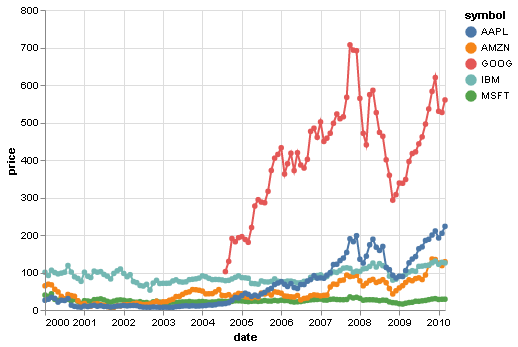

In [162]:
# Multiple Marks
from vega_datasets import data
source = data.stocks()

alt.Chart(source).mark_line(point=True).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

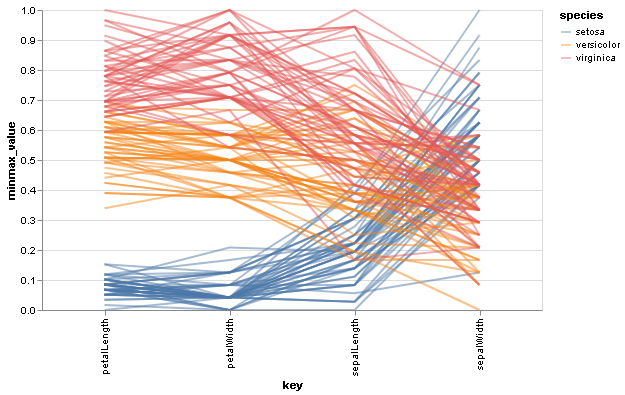

In [166]:
# Normalized Parallel Coordinates Example
from vega_datasets import data
from altair import datum

source = data.iris()

alt.Chart(source).transform_window(
    index='count()'
).transform_fold(
    ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
).transform_joinaggregate(
     min='min(value)',
     max='max(value)',
     groupby=['key']
).transform_calculate(
    minmax_value=(datum.value-datum.min)/(datum.max-datum.min),
    mid=(datum.min+datum.max)/2
).mark_line().encode(
    x='key:N',
    y='minmax_value:Q',
    color='species:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

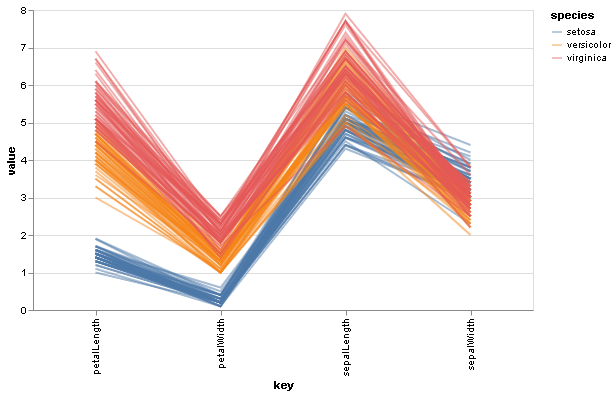

In [167]:
# Parallel Coordinates Example
from vega_datasets import data
source = data.iris()

alt.Chart(source).transform_window(
    index='count()'
).transform_fold(
    ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
).mark_line().encode(
    x='key:N',
    y='value:Q',
    color='species:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

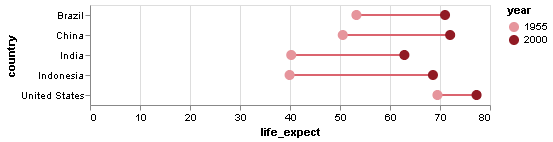

In [168]:
# Ranged Dot Plot
from vega_datasets import data

source = data.countries.url

chart = alt.layer(
    data=source
).transform_filter(
    filter={"field": 'country',
            "oneOf": ["China", "India", "United States", "Indonesia", "Brazil"]}
).transform_filter(
    filter={'field': 'year',
            "oneOf": [1955, 2000]}
)

chart += alt.Chart().mark_line(color='#db646f').encode(
    x='life_expect:Q',
    y='country:N',
    detail='country:N'
)
# Add points for life expectancy in 1955 & 2000
chart += alt.Chart().mark_point(
    size=100,
    opacity=1,
    filled=True
).encode(
    x='life_expect:Q',
    y='country:N',
    color=alt.Color('year:O',
        scale=alt.Scale(
            domain=['1955', '2000'],
            range=['#e6959c', '#911a24']
        )
    )
).interactive()

chart


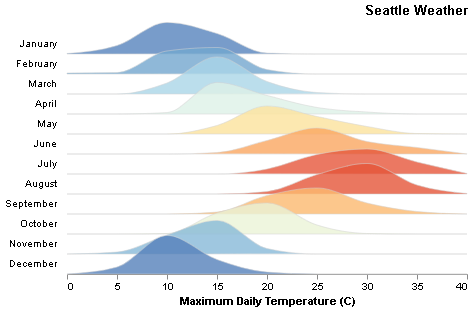

In [169]:
# Ridgeline plot Example
source = data.seattle_weather.url

step = 20
overlap = 1

alt.Chart(source, height=step).transform_timeunit(
    Month='month(date)'
).transform_joinaggregate(
    mean_temp='mean(temp_max)', groupby=['Month']
).transform_bin(
    ['bin_max', 'bin_min'], 'temp_max'
).transform_aggregate(
    value='count()', groupby=['Month', 'mean_temp', 'bin_min', 'bin_max']
).transform_impute(
    impute='value', groupby=['Month', 'mean_temp'], key='bin_min', value=0
).mark_area(
    interpolate='monotone',
    fillOpacity=0.8,
    stroke='lightgray',
    strokeWidth=0.5
).encode(
    alt.X('bin_min:Q', bin='binned', title='Maximum Daily Temperature (C)'),
    alt.Y(
        'value:Q',
        scale=alt.Scale(range=[step, -step * overlap]),
        axis=None
    ),
    alt.Fill(
        'mean_temp:Q',
        legend=None,
        scale=alt.Scale(domain=[30, 5], scheme='redyellowblue')
    )
).facet(
    row=alt.Row(
        'Month:T',
        title=None,
        header=alt.Header(labelAngle=0, labelAlign='right', format='%B')
    )
).properties(
    title='Seattle Weather',
    bounds='flush'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_title(
    anchor='end'
)

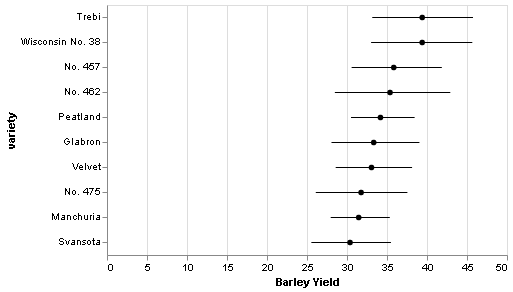

In [171]:
# Sorted Error Bars showing Confidence Interval
source = data.barley()

points = alt.Chart(source).mark_point(
    filled=True,
    color='black'
).encode(
    x=alt.X('mean(yield)', title='Barley Yield'),
    y=alt.Y(
        'variety',
         sort=alt.EncodingSortField(
             field='yield',
             op='mean',
             order='descending'
         )
    )
).properties(
    width=400,
    height=250
)

error_bars = points.mark_rule().encode(
    x='ci0(yield)',
    x2='ci1(yield)',
)

points + error_bars

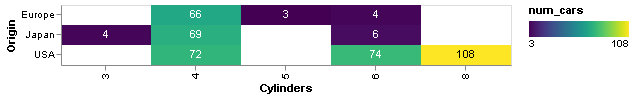

In [173]:
# Text over a Heatmap
source = data.cars()

# Configure common options
base = alt.Chart(source).transform_aggregate(
    num_cars='count()',
    groupby=['Origin', 'Cylinders']
).encode(
    alt.X('Cylinders:O', scale=alt.Scale(paddingInner=0)),
    alt.Y('Origin:O', scale=alt.Scale(paddingInner=0)),
)

# Configure heatmap
heatmap = base.mark_rect().encode(
    color=alt.Color('num_cars:Q',
        scale=alt.Scale(scheme='viridis'),
        legend=alt.Legend(direction='horizontal')
    )
)

# Configure text
text = base.mark_text(baseline='middle').encode(
    text='num_cars:Q',
    color=alt.condition(
        alt.datum.num_cars > 100,
        alt.value('black'),
        alt.value('white')
    )
)

# Draw the chart
heatmap + text

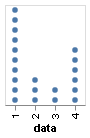

In [176]:
# Wilkinson Dot Plot
source = pd.DataFrame(
    {"data":[1,1,1,1,1,1,1,1,1,1,
             2,2,2,
             3,3,
             4,4,4,4,4,4]
    }
)

alt.Chart(source).mark_circle(opacity=1).transform_window(
    id='rank()',
    groupby=['data']
).encode(
    alt.X('data:O'),
    alt.Y('id:O',
          axis=None,
          sort='descending')
).properties(height=100)

---

<a href="https://midoritoyota.netlify.app/" target="_blank"><img align="left" src="portfolio.png" title="See my portfolio!"/></a><img align="left" src="espaco.png"/>

<a href="mailto:midori.toyota@gmail.com" target="_blank"><img align="left" src="gmail.png" title="Contact me!"/></a><img align="left" src="espaco.png"/>

<a href="https://www.linkedin.com/in/midoritoyota/" target="_blank"> <img align="left" src="linkedin.png" title="Connect with me on linkedin!" /></a><img align="left" src="espaco.png"/>

<a href="https://github.com/MidoriToyota" target="_blank"> <img align="left" src="github.png" title="Follow me on github!"/></a>

<br/><br/>